<a href="https://colab.research.google.com/github/AharonRemez/Animals---Classification-using-CNN/blob/main/Animals_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
!kaggle datasets download -d alessiocorrado99/animals10
!unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from pathlib import Path

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data_dir = Path('/content/raw-img')

# ספירת מספר התמונות בתיקיות
image_count = len(list(data_dir.glob('**/*.jpeg'))) + len(list(data_dir.glob('**/*.jpg')))
print(f"Number of images: {image_count}")

Number of images: 26128


In [ ]:
batch_size = 64
img_height = 300
img_width = 300

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [ ]:
class_names = ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'spider', 'squirrel']

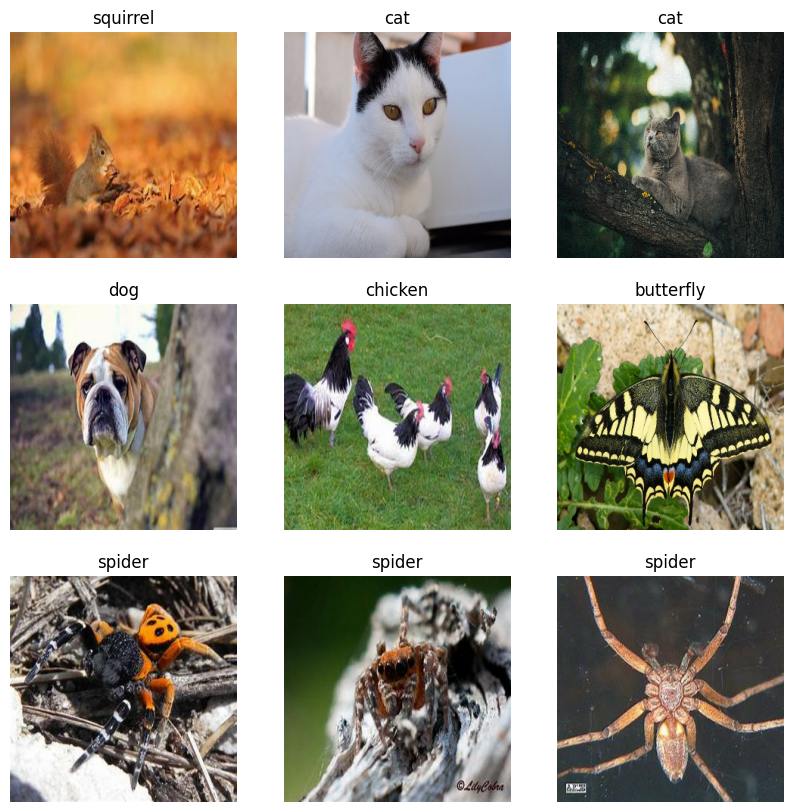

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): #one batch from train data
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds: #train data
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 300, 300, 3)
(64,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:

# בניית המודל עם Data Augmentation ו-Regularization
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))  # Assuming you have 90 classes
])

# קומפילציה של המודל
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=20
history = model.fit(
    train_ds,
    validation_data=val_ds,  # Pass the validation dataset here
    epochs=epochs
)

Epoch 1/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - accuracy: 0.9237 - loss: 0.2204 - val_accuracy: 0.7511 - val_loss: 1.0992
Epoch 2/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.9365 - loss: 0.1943 - val_accuracy: 0.7297 - val_loss: 1.1331
Epoch 3/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.9302 - loss: 0.1994 - val_accuracy: 0.7480 - val_loss: 1.0878
Epoch 4/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 37s 57ms/step - accuracy: 0.9383 - loss: 0.1846 - val_accuracy: 0.7345 - val_loss: 1.1160
Epoch 5/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.9449 - loss: 0.1672 - val_accuracy: 0.7435 - val_loss: 1.1182
Epoch 6/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.9397 - loss: 0.1836 - val_accuracy: 0.7515 - val_loss: 1.0916
Epoch 7/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.9461 - loss: 0.1618 - val_accuracy: 0.7383 - val_loss: 1.1544
Epoch 8/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.9398 - loss: 0.1833 - 

Saving AF184484-565F-44DD-A35D-7F229909C7D3-875x1024iioi.jpg to AF184484-565F-44DD-A35D-7F229909C7D3-875x1024iioi (1).jpg
1/1 [==============================] - 2s 2s/step
This image most likely belongs to cat with a 10.25 percent confidence.


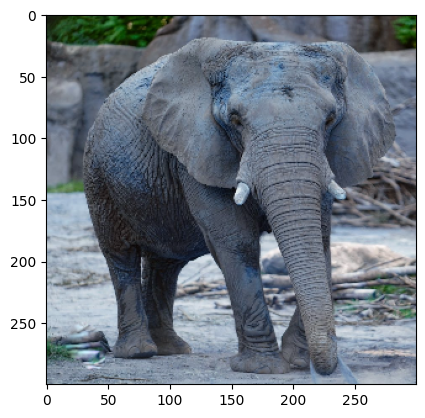

In [ ]:
from google.colab import files
import cv2

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = cv2.imread(path)
  img = cv2.resize(img,(img_height,img_width))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )
  plt.imshow(img)


164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


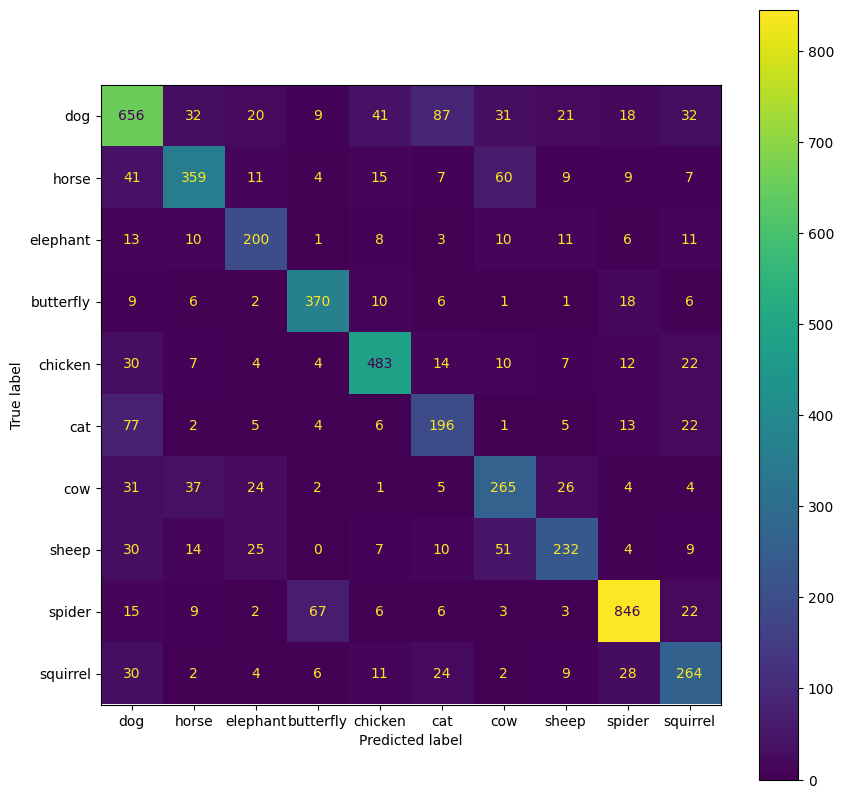

In [ ]:
# prompt: צור ConfusionMatrixDisplay גדולה

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions for the validation set
y_pred = model.predict(val_ds)
y_pred = np.argmax(y_pred, axis=1)

# Get true labels for the validation set
y_true = np.concatenate([y for x, y in val_ds], axis=0)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a larger ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figure size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax)
plt.show()


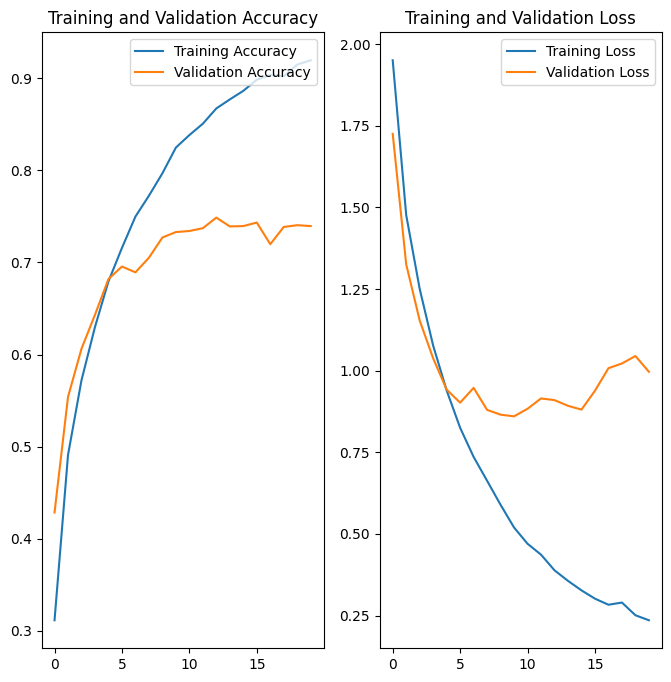

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()